In [1]:
import re
import matplotlib.pyplot as plt

def parse_log(filepath):
    steps, losses, lrs, norms = [], [], [], []
    validation_losses, validation_steps = [], []
    hellaswag_accuracies, accuracy_steps = [], []
    step_counter = 0
    with open(filepath, 'r') as file:
        for line in file:
            if line.startswith('step'):
                step_match = re.search(r'step\s+(\d+)', line)
                loss_match = re.search(r'loss:\s+([\d.]+)', line)
                lr_match = re.search(r'lr\s+([\d.e-]+)', line)
                norm_match = re.search(r'norm:\s+([\d.]+)', line)

                if step_match and loss_match and lr_match and norm_match:
                    step = int(step_match.group(1))
                    steps.append(step)
                    losses.append(float(loss_match.group(1)))
                    lrs.append(float(lr_match.group(1)))
                    norms.append(float(norm_match.group(1)))
                    step_counter = step

            elif 'validation loss' in line:
                validation_loss_match = re.search(r'validation loss:\s+([\d.]+)', line)
                if validation_loss_match:
                    validation_losses.append(float(validation_loss_match.group(1)))
                    validation_steps.append(step_counter)

            elif 'HellaSwag accuracy' in line:
                accuracy_match = re.search(r'HellaSwag accuracy:\s+\d+/\d+=(\d.\d+)', line)
                if accuracy_match:
                    hellaswag_accuracies.append(float(accuracy_match.group(1)))
                    accuracy_steps.append(step_counter)  # Use the most recent step for plotting

    return steps, losses, lrs, norms, validation_steps, validation_losses, accuracy_steps, hellaswag_accuracies

def plot_loss_and_validation_loss(training_steps, training_losses, validation_steps, validation_losses):
    plt.figure(figsize=(8, 5))
    plt.plot(training_steps, training_losses, label='Training Loss', color='blue')
    plt.plot(validation_steps, validation_losses, label='Validation Loss', color='red')
    plt.xlabel('Step')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss per Step')
    plt.grid(True)
    plt.legend()
    plt.show()

def plot_stats(steps, values, label, ylabel, title, color):
    plt.figure(figsize=(8, 5))
    plt.plot(steps, values, label=label, color=color)
    plt.xlabel('Step')
    plt.ylabel(ylabel)
    plt.title(title)
    plt.grid(True)
    plt.legend()
    plt.show()

def plot_stats_from_log(log_file):
    steps, losses, lrs, norms, validation_steps, validation_losses, accuracy_steps, hellaswag_accuracies = parse_log(log_file)

    if steps:
        if validation_losses:
            plot_loss_and_validation_loss(steps, losses, validation_steps, validation_losses)

        plot_stats(steps, norms, 'Norm', 'Norm', 'Norm per Step', 'green')

        plot_stats(steps, lrs, 'Learning Rate', 'Learning Rate', 'Learning Rate per Step', 'orange')

        if hellaswag_accuracies:
            plot_stats(accuracy_steps, hellaswag_accuracies, 'HellaSwag Accuracy', 'Accuracy', 'HellaSwag Accuracy per Step', 'purple')
    else:
        print("No data found in the log file")



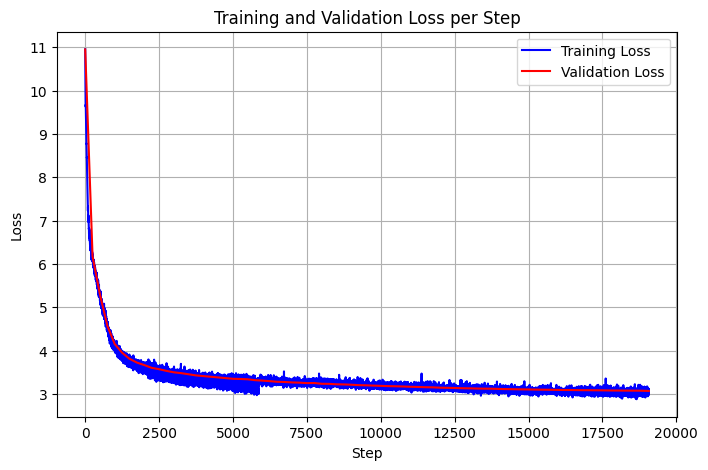

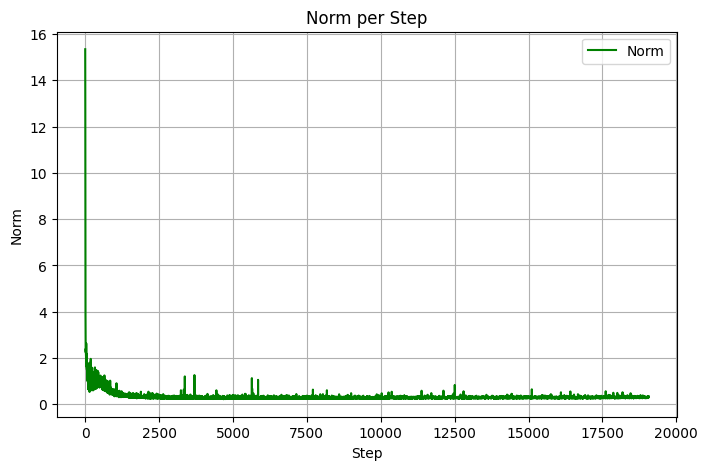

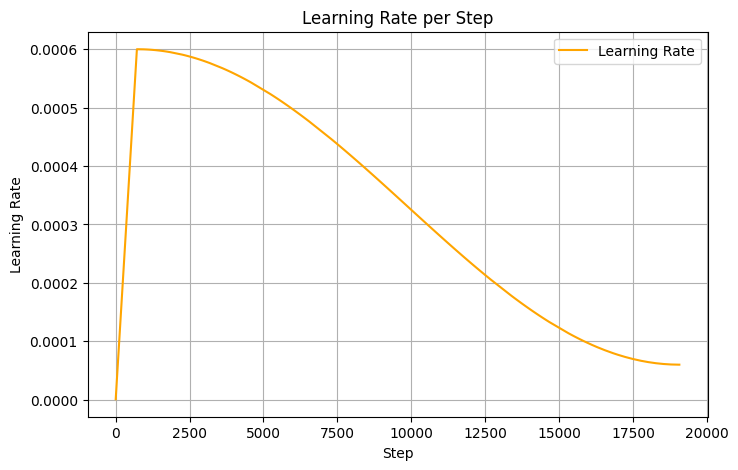

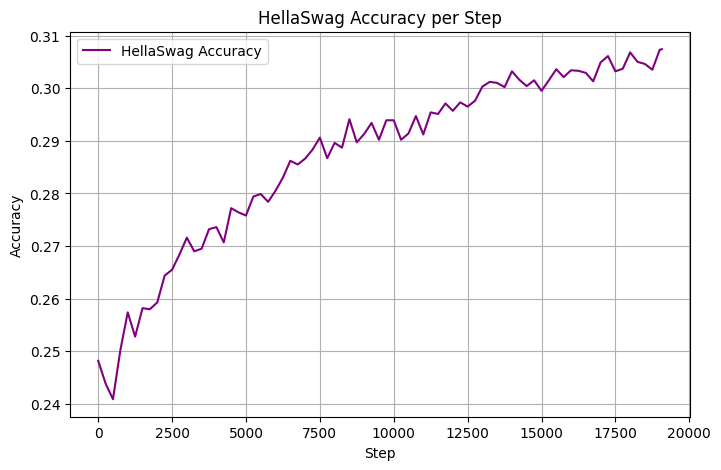

In [2]:
plot_stats_from_log('out/train-2x-h100-overnight.log') #incomplete WIP run

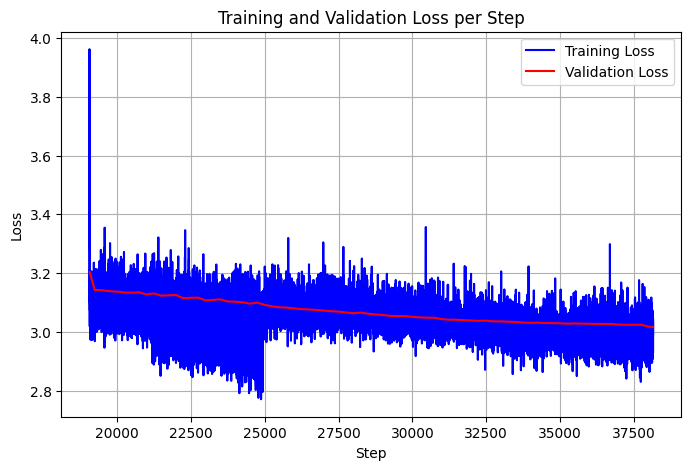

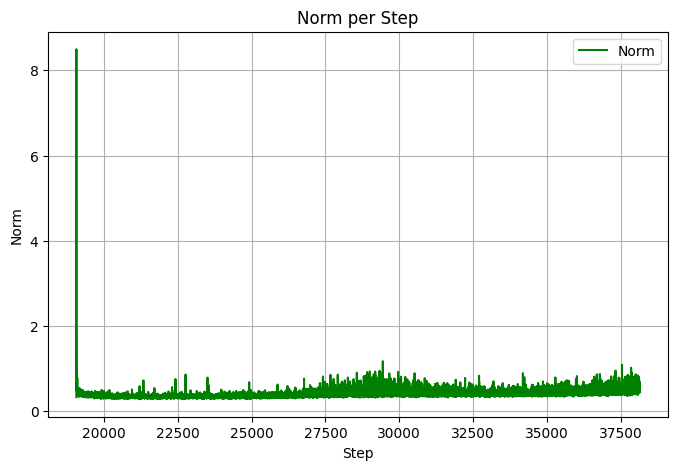

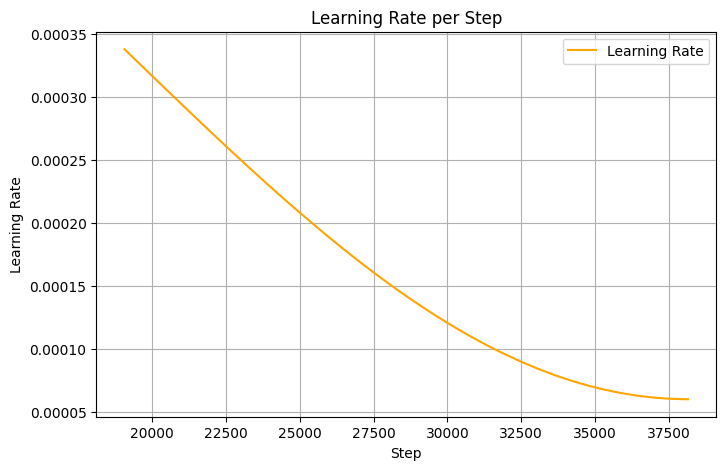

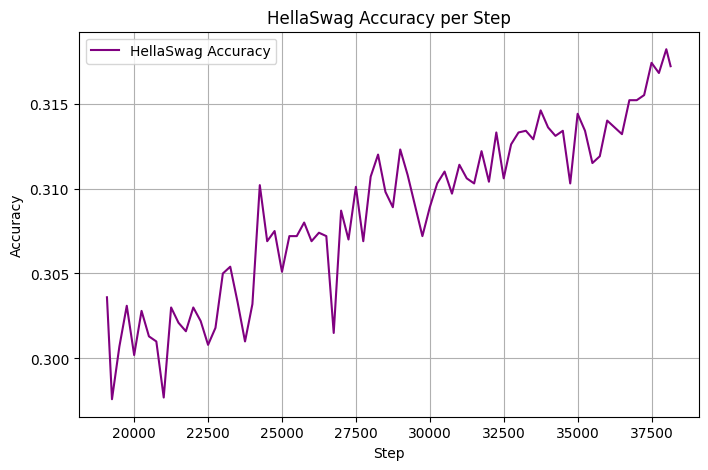

In [4]:
plot_stats_from_log('out/2024-11-19-00-10-43.log')